In [1]:
# %% [markdown]
# ## Unsupervised AAE – MNIST
# Stand-alone version (no inheritance) + clustering accuracy

# %%
import torch, torch.nn as nn
from pathlib import Path
import matplotlib.pyplot as plt

from unsupervised import (
    UAAEConfig,
    UnsupervisedAdversarialAutoencoder,
)
from dataloader import load_mnist_data          # your helper


In [2]:
# %%
BATCH_SIZE   = 128
VAL_FRAC     = 0.10
device       = torch.device("mps")

# full train/test loaders
train_full, test_loader = load_mnist_data(batch_size=BATCH_SIZE, num_samples=-1)

# carve a validation split out of the training loader’s dataset
full_train_ds = train_full.dataset            # underlying Dataset object
n_val         = int(len(full_train_ds) * VAL_FRAC)

val_ds, train_ds = torch.utils.data.random_split(
    full_train_ds, [n_val, len(full_train_ds) - n_val], generator=torch.Generator().manual_seed(42)
)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  drop_last=True)
val_loader   = torch.utils.data.DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False)

print(f"Train batches: {len(train_loader)}  |  Val samples: {len(val_ds)}")


Train batches: 421  |  Val samples: 6000


In [3]:
# %%
cfg = UAAEConfig(
    input_dim   = 784,
    ae_hidden   = 3000,
    disc_hidden = 3000,
    latent_dim_categorical = 16,
    latent_dim_style = 5,
    device      = device,
)

model = UnsupervisedAdversarialAutoencoder(cfg)
print(model)


<UnsupervisedAAE input_dim=784, ae_hidden=3000, disc_hidden=3000, latent_dim_categorical=16, latent_dim_style=5, use_decoder_sigmoid=True, recon_loss_fn=MSELoss(), adv_loss_fn=BCEWithLogitsLoss(), device=mps>


In [4]:
# %%
model.fit(
    train_loader  = train_loader,
    val_loader  = val_loader,     # gives val accuracy each epoch
    epochs      = 200, # 1500
    prior_std   = 1.0,
    result_folder     = Path("runs/unsup_aae"),
)
        self.encoder.apply(weights_init)
        self.decoder.apply(weights_init)
        self.discriminator_categorical.apply(weights_init)
        self.discriminator_style.apply(weights_init)        self.encoder.apply(weights_init)
        self.decoder.apply(weights_init)
        self.discriminator_categorical.apply(weights_init)
        self.discriminator_style.apply(weights_init)        self.encoder.apply(weights_init)
        self.decoder.apply(weights_init)
        self.discriminator_categorical.apply(weights_init)
        self.discriminator_style.apply(weights_init)        self.encoder.apply(weights_init)
        self.decoder.apply(weights_init)
        self.discriminator_categorical.apply(weights_init)
        self.discriminator_style.apply(weights_init)        self.encoder.apply(weights_init)
        self.decoder.apply(weights_init)
        self.discriminator_categorical.apply(weights_init)
        self.discriminator_style.apply(weights_init)

Epoch [1/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 1/200 - Recon: 0.2301, Disc_Cat: 1.2458, Gen_Cat: 0.7927, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [2/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 2/200 - Recon: 0.2273, Disc_Cat: 1.2379, Gen_Cat: 1.0035, Disc_Style: 1.3864, Gen_Style: 0.6931


Epoch [3/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 3/200 - Recon: 0.2241, Disc_Cat: 1.2758, Gen_Cat: 0.9532, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [4/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 4/200 - Recon: 0.2199, Disc_Cat: 1.2888, Gen_Cat: 0.9334, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [5/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 74.57%
Epoch 5/200 - Recon: 0.2133, Disc_Cat: 1.2963, Gen_Cat: 0.9236, Disc_Style: 1.3863, Gen_Style: 0.6934


Epoch [6/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 6/200 - Recon: 0.2010, Disc_Cat: 1.3073, Gen_Cat: 0.9081, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [7/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 7/200 - Recon: 0.1737, Disc_Cat: 1.3056, Gen_Cat: 0.9071, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [8/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 8/200 - Recon: 0.1215, Disc_Cat: 1.3073, Gen_Cat: 0.9074, Disc_Style: 1.3862, Gen_Style: 0.6935


Epoch [9/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 9/200 - Recon: 0.0826, Disc_Cat: 1.2821, Gen_Cat: 0.9194, Disc_Style: 1.3862, Gen_Style: 0.6932


Epoch [10/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 73.60%
Epoch 10/200 - Recon: 0.0722, Disc_Cat: 1.2787, Gen_Cat: 0.9134, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [11/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 11/200 - Recon: 0.0694, Disc_Cat: 1.2813, Gen_Cat: 0.9090, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [12/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 12/200 - Recon: 0.0682, Disc_Cat: 1.2800, Gen_Cat: 0.9144, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [13/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 13/200 - Recon: 0.0677, Disc_Cat: 1.2828, Gen_Cat: 0.9110, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [14/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 14/200 - Recon: 0.0672, Disc_Cat: 1.2690, Gen_Cat: 0.9327, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [15/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 68.80%
Epoch 15/200 - Recon: 0.0669, Disc_Cat: 1.2461, Gen_Cat: 0.9341, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [16/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 16/200 - Recon: 0.0666, Disc_Cat: 1.2442, Gen_Cat: 0.9371, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [17/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 17/200 - Recon: 0.0664, Disc_Cat: 1.2478, Gen_Cat: 0.9317, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [18/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 18/200 - Recon: 0.0662, Disc_Cat: 1.2472, Gen_Cat: 0.9367, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [19/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 19/200 - Recon: 0.0660, Disc_Cat: 1.2455, Gen_Cat: 0.9317, Disc_Style: 1.3863, Gen_Style: 0.6934


Epoch [20/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 68.13%
Epoch 20/200 - Recon: 0.0658, Disc_Cat: 1.2528, Gen_Cat: 0.9207, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [21/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 21/200 - Recon: 0.0657, Disc_Cat: 1.2540, Gen_Cat: 0.9136, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [22/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 22/200 - Recon: 0.0656, Disc_Cat: 1.2503, Gen_Cat: 0.9164, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [23/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 23/200 - Recon: 0.0655, Disc_Cat: 1.2488, Gen_Cat: 0.9229, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [24/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 24/200 - Recon: 0.0655, Disc_Cat: 1.2463, Gen_Cat: 0.9253, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [25/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 69.50%
Epoch 25/200 - Recon: 0.0653, Disc_Cat: 1.2470, Gen_Cat: 0.9281, Disc_Style: 1.3862, Gen_Style: 0.6932


Epoch [26/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 26/200 - Recon: 0.0653, Disc_Cat: 1.2605, Gen_Cat: 0.9242, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [27/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 27/200 - Recon: 0.0651, Disc_Cat: 1.2451, Gen_Cat: 0.9339, Disc_Style: 1.3862, Gen_Style: 0.6933


Epoch [28/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 28/200 - Recon: 0.0650, Disc_Cat: 1.2485, Gen_Cat: 0.9286, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [29/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 29/200 - Recon: 0.0650, Disc_Cat: 1.2521, Gen_Cat: 0.9162, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [30/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 67.68%
Epoch 30/200 - Recon: 0.0650, Disc_Cat: 1.2531, Gen_Cat: 0.9195, Disc_Style: 1.3863, Gen_Style: 0.6934


Epoch [31/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 31/200 - Recon: 0.0649, Disc_Cat: 1.2504, Gen_Cat: 0.9184, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [32/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 32/200 - Recon: 0.0648, Disc_Cat: 1.2496, Gen_Cat: 0.9203, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [33/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 33/200 - Recon: 0.0647, Disc_Cat: 1.2513, Gen_Cat: 0.9178, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [34/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 34/200 - Recon: 0.0646, Disc_Cat: 1.2547, Gen_Cat: 0.9098, Disc_Style: 1.3862, Gen_Style: 0.6933


Epoch [35/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 66.02%
Epoch 35/200 - Recon: 0.0645, Disc_Cat: 1.2576, Gen_Cat: 0.9050, Disc_Style: 1.3862, Gen_Style: 0.6933


Epoch [36/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 36/200 - Recon: 0.0645, Disc_Cat: 1.2588, Gen_Cat: 0.9027, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [37/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 37/200 - Recon: 0.0644, Disc_Cat: 1.2563, Gen_Cat: 0.9070, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [38/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 38/200 - Recon: 0.0643, Disc_Cat: 1.2543, Gen_Cat: 0.9130, Disc_Style: 1.3862, Gen_Style: 0.6932


Epoch [39/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 39/200 - Recon: 0.0642, Disc_Cat: 1.2557, Gen_Cat: 0.9073, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [40/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 67.00%
Epoch 40/200 - Recon: 0.0641, Disc_Cat: 1.2560, Gen_Cat: 0.9035, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [41/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 41/200 - Recon: 0.0640, Disc_Cat: 1.2546, Gen_Cat: 0.9071, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [42/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 42/200 - Recon: 0.0639, Disc_Cat: 1.2543, Gen_Cat: 0.9062, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [43/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 43/200 - Recon: 0.0639, Disc_Cat: 1.2570, Gen_Cat: 0.9021, Disc_Style: 1.3863, Gen_Style: 0.6931


Epoch [44/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 44/200 - Recon: 0.0638, Disc_Cat: 1.2588, Gen_Cat: 0.8997, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [45/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 67.55%
Epoch 45/200 - Recon: 0.0637, Disc_Cat: 1.2605, Gen_Cat: 0.8944, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [46/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 46/200 - Recon: 0.0636, Disc_Cat: 1.2557, Gen_Cat: 0.9029, Disc_Style: 1.3863, Gen_Style: 0.6932


Epoch [47/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 47/200 - Recon: 0.0635, Disc_Cat: 1.2586, Gen_Cat: 0.8942, Disc_Style: 1.3862, Gen_Style: 0.6933


Epoch [48/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 48/200 - Recon: 0.0634, Disc_Cat: 1.2586, Gen_Cat: 0.8963, Disc_Style: 1.3863, Gen_Style: 0.6933


Epoch [49/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Epoch 49/200 - Recon: 0.0632, Disc_Cat: 1.2593, Gen_Cat: 0.8970, Disc_Style: 1.3862, Gen_Style: 0.6932


Epoch [50/200]:   0%|          | 0/421 [00:00<?, ?it/s]

Validation Clustering Accuracy: 66.80%
Epoch 50/200 - Recon: 0.0632, Disc_Cat: 1.2517, Gen_Cat: 0.8840, Disc_Style: 1.3862, Gen_Style: 0.6928


TypeError: save_weights() got multiple values for argument 'path_prefix'

In [ ]:
# %%
test_acc = model.evaluate_clustering(test_loader)
print(f"Test clustering accuracy: {test_acc:.2%}")


Test clustering accuracy: 26.90%


ValueError: object __array__ method not producing an array

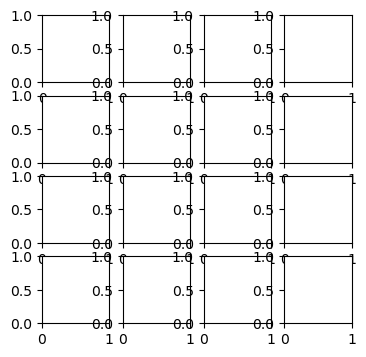

In [6]:
# %%
with torch.no_grad():
    samples = model.generate(16).cpu().view(-1, 28, 28)

fig, axes = plt.subplots(4, 4, figsize=(4,4))
for ax, img in zip(axes.flatten(), samples):
    ax.imshow(img, cmap="gray")
    ax.axis("off")
plt.tight_layout()


In [ ]:
# %%
model.save_weights("weights/unsup_aae_final")
